# Web Scraping Exercise

### Scraping Indeed Job Search Results

Importing all relevant packages.

In [1]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

<p> Defining two important functions: get_link(position, city, province) will generate the Indeed website link once you enter your wanted job position, the city and province in Canada, get_record(card) will provide you a tuple of a relevant job information including job title, company, job location, post date, today, job summary, job salary and job url. </p>

In [2]:
def get_link(position, city, province):
    template = "https://ca.indeed.com/jobs?q={}&l={}%2C+{}"
    url = template.format(position, city, province)
    return url

def get_record(card):
    atag = card.h2.a
    job_title = atag.get("title")
    job_url =  "https://ca.indeed.com" + atag.get("href")
    company = card.find("span", "company").text.strip()
    

    today = datetime.today().strftime("%Y-%m-%d")
    try:
        job_location = card.find("div", "recJobLoc").get("data-rc-loc")
    except:
        job_location = " "
    try:
        job_salary = card.find("span", "salaryText").text.strip()
    except:
        job_salary = " "
    try:
        job_summary = card.find("div", "summary").text.strip()
    except:
        job_summary = " "
    try:
        post_date = card.find("span", "date").text
    except:
        post_date = " "
        
    record = (job_title, company, job_location, post_date, today, job_summary, job_salary, job_url)
    
    return record


<p> The main(position, city, province) function takes your wanted job position, the city and province in Canada and eventually enter a dataframe of all jobs in your wanted region. </p>

In [3]:
#New version main
def main(position, city, province):
    records = []
    url = get_link(position, city, province)
    
    while True:
        response = requests.get(url)
        soup = bs(response.text, 'html.parser')
        cards = soup.find_all("div", attrs={'class': 'jobsearch-SerpJobCard'})
        
        for card in cards:
            record = get_record(card)
            records.append(record)
            
        try:
            url = "https://ca.indeed.com" + soup.find("a", {"aria-label": "Next"}).get("href")
        except AttributeError:
            break
    
    records = pd.DataFrame(records, columns = ["job_title", "company", "job_location", "post_date", "today", "job_summary", "job_salary", "job_url"])
    return records

An example follows.

In [4]:
main("data analyst", "toronto", "ON")

,job_title,company,job_location,post_date,today,job_summary,job_salary,job_url
0,Fenergo Data Analyst,Aerotek,,,2020-12-15,,,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,Junior BI Developer/Analyst,Magna International Inc.,,,2020-12-15,,,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,Junior Decision Support Analyst,Reconnect Community Health Services,"Toronto, ON",15 days ago,2020-12-15,Gather and process project data and other busi...,"$42,000 - $50,000 a year",https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,Senior Analyst,Amphenol Cnaada Corp,"Scarborough, ON",Today,2020-12-15,Analysis of various product related data to su...,,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,Data Systems/Analyst {Experience Required},A.S. May,"Mississauga, ON",Today,2020-12-15,"Adding new data, data collection. creating rep...","$60,000 - $65,000 a year",https://ca.indeed.com/company/A.S.-May/jobs/Da...
...,...,...,...,...,...,...,...,...
578,Business Analyst (Dynamics CRM) - 299785,Procom,,,2020-12-15,,,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...
579,Experienced ETL tester/BI expert with automati...,Olymp Technologies,"Toronto, ON",5 days ago,2020-12-15,Demonstrated experience analyzing and testing ...,,https://ca.indeed.com/company/Ministry-of-Heal...
580,Salesforce Business Systems Analyst,Affinity Staffing,"Toronto, ON",30+ days ago,2020-12-15,"Through user story definition, logical data mo...",,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...
581,Bilingual Capital Markets Business Analyst - 2...,Procom,,,2020-12-15,,,https://ca.indeed.com/pagead/clk?mo=r&ad=-6NYl...


### Scraping a Table From a Webpage

In [5]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

Getting the table we want on the website.

In [6]:
# Get the webpage and table 
w = requests.get("https://ca.finance.yahoo.com/quote/OXY/history?period1=1574897548&period2=1606519948&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true")
web = bs(w.content)
# add \ before special symbols
table1 = web.select("table.W\(100\%\).M\(0\)")[0]

<img align="right" src="Images/Yahoo.png" width = "300" /> 
<p> For instance, we are interested in the historical price of a certain stock on Yahoo, as shown on the right, yet we can't download the chart from the website. We can instead, scrape this table on historical price from the date range we want and convert them into a dataframe. </p>

Reading the html code of the webpage and accquire its columns and column names.

In [8]:
#get table columns
columns = table1.find("thead").find_all("th")

#get column names
column_name = []
for c in columns:
    column_name.append(c.string)


Returning the table from the webpage and taking a first look at the table. 

In [9]:
# Get the table
rows = table1.find("tbody").find_all("tr")

l = []
for tr in rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td]
    l.append(row)

df = pd.DataFrame(l, columns = column_name)
df["Code"] = "OXY"
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values(by = ["Date"], ascending = True)


,Date,Open,High,Low,Close*,Adj Close**,Volume,Code
99,2020-07-10,16.06,16.75,15.95,16.71,16.68,"17,584,200",OXY
98,2020-07-13,16.76,16.81,16.00,16.16,16.14,"21,665,700",OXY
97,2020-07-14,15.95,16.76,15.75,16.68,16.65,"19,740,500",OXY
96,2020-07-15,17.29,17.73,16.90,17.18,17.15,"22,801,400",OXY
95,2020-07-16,16.90,17.40,16.57,17.01,16.98,"15,463,000",OXY
...,...,...,...,...,...,...,...,...
4,2020-11-20,13.69,13.71,13.30,13.49,13.48,"20,149,800",OXY
3,2020-11-23,13.85,15.81,13.83,15.76,15.75,"44,957,100",OXY
2,2020-11-24,16.97,17.27,16.31,16.78,16.77,"54,355,000",OXY
1,2020-11-25,16.65,17.10,15.94,16.72,16.71,"29,706,200",OXY


<p> We could drop the useless column "index" and convert all other columns to float instead of strings. </p> 


### Scraping Multiple Tables 

<p> If we have a list of stocks we are interested, we can put them in a list and run for each. Eventually, we will have a concatenated dataframe. In this case, we will be looking at the stocks "JMIA", "BA", "OXY", "SU" and "FB" as an example. </p>

In [11]:
list = ["JMIA", "BA", "OXY", "SU", "FB"]
d = {}


for i in range(len(list)):
    w = requests.get("https://ca.finance.yahoo.com/quote/" + list[i] + "/history?p=JMIA&.tsrc=fin-srch")
    web = bs(w.content)
    
    table = web.select("table.W\(100\%\).M\(0\)")[0]

    columns = table.find("thead").find_all("th")


    column_name = []
    for c in columns:
        column_name.append(c.string)

    rows = table.find("tbody").find_all("tr")

    l = []
    for tr in rows:
        td = tr.find_all('td')
        row = [tr.text.strip() for tr in td]
        l.append(row)
    
    temp = pd.DataFrame(l, columns = column_name)
    temp["Stock_Code"] = list[i]
    temp["Date"] = pd.to_datetime(temp["Date"])
    temp.reset_index()
    d[i] = temp

    
df = pd.concat(d.values(), ignore_index=True)


Modifying the dataset and changing columns to relevant datatypes.

In [12]:
df = pd.DataFrame(df)
df1 = df.sort_values(by = ["Stock_Code", "Date"]).reset_index()
df1['Open'] = pd.to_numeric(df1['Open'],errors='coerce')

We can plot the result with Seaborn.

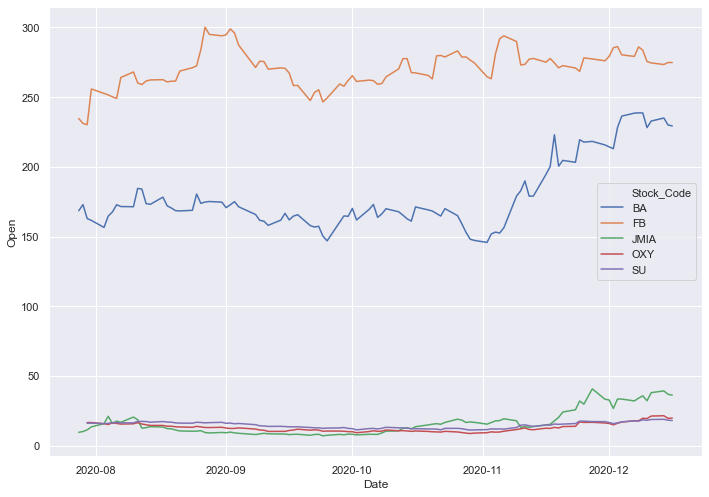

In [13]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df1, x='Date', y='Open', hue='Stock_Code')

### Scraping All Images From a Webpage

We can also download all the images from a webpage, in this case, we will be looking at the Wikipedia page of "Sherlock Holmes". 

In [14]:
import re
import requests
from bs4 import BeautifulSoup

site = 'https://en.wikipedia.org/wiki/Sherlock_Holmes'

response = requests.get(site)

soup = BeautifulSoup(response.text, 'html.parser')
img_tags = soup.find_all('img')

urls = [img['src'] for img in img_tags]

After running the following codes, all images with correct urls will be downloaded to the designated folder. A messgage will be generated, telling you the number of images you have successfully downloaded. 

In [16]:
import os

for i in range(len(urls)):
    if "http" not in urls[i]:
        urls[i] = "https:" + urls[i]
    name = i
    fullname = str(name)+ ".jpg"
    try: 
        fullfilename = os.path.join("D:\\My Projects\\Downloaded images", fullname)
        urllib.request.urlretrieve(urls[i],fullfilename)
    except: 
        pass

print("Message: " + str(len(os.listdir("D:\\My Projects\\Downloaded images"))) + " images have been downloaded at your chosen folder.")

Message: 44 images have been downloaded at your chosen folder.
